In [1]:
import math
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
import sys
print sys.path
%matplotlib inline

['', '/Users/rtindru/anaconda/lib/python2.7/site-packages/seaborn-0.7.0-py2.7.egg', '/Users/rtindru/anaconda/lib/python27.zip', '/Users/rtindru/anaconda/lib/python2.7', '/Users/rtindru/anaconda/lib/python2.7/plat-darwin', '/Users/rtindru/anaconda/lib/python2.7/plat-mac', '/Users/rtindru/anaconda/lib/python2.7/plat-mac/lib-scriptpackages', '/Users/rtindru/anaconda/lib/python2.7/lib-tk', '/Users/rtindru/anaconda/lib/python2.7/lib-old', '/Users/rtindru/anaconda/lib/python2.7/lib-dynload', '/Users/rtindru/anaconda/lib/python2.7/site-packages/Sphinx-1.3.5-py2.7.egg', '/Users/rtindru/anaconda/lib/python2.7/site-packages/setuptools-20.3-py2.7.egg', '/Users/rtindru/anaconda/lib/python2.7/site-packages', '/Users/rtindru/anaconda/lib/python2.7/site-packages/aeosa', '/Users/rtindru/anaconda/lib/python2.7/site-packages/IPython/extensions', '/Users/rtindru/.ipython']


/Users/rtindru/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:43: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df_train = pd.read_csv('../Kaggle_Datasets/Facebook/train.csv')
df_test = pd.read_csv('../Kaggle_Datasets/Facebook/test.csv')

In [86]:
df_train['log10_accu'] = np.log10(df_train.accuracy) * 10
df_train['log2_accu'] = np.log2(df_train.accuracy) * 10

In [64]:
min_times = []
for i in xrange(5000):
    l = i / 500.0
    r = (i+1) / 500.0
    sdf = df_train[(df_train.x > l) & (df_train.x <= r)]
    min_times.append({
            'row': r, 
            'min_time': sdf.time.min(), 
            'max_time': sdf.time.max(),
            'min_accu': sdf.accuracy.min(),
            'max_accu': sdf.accuracy.max(),
            'min_laccu': sdf.log10_accu.min(),
            'max_laccu': sdf.log10_accu.max(),
            
        })

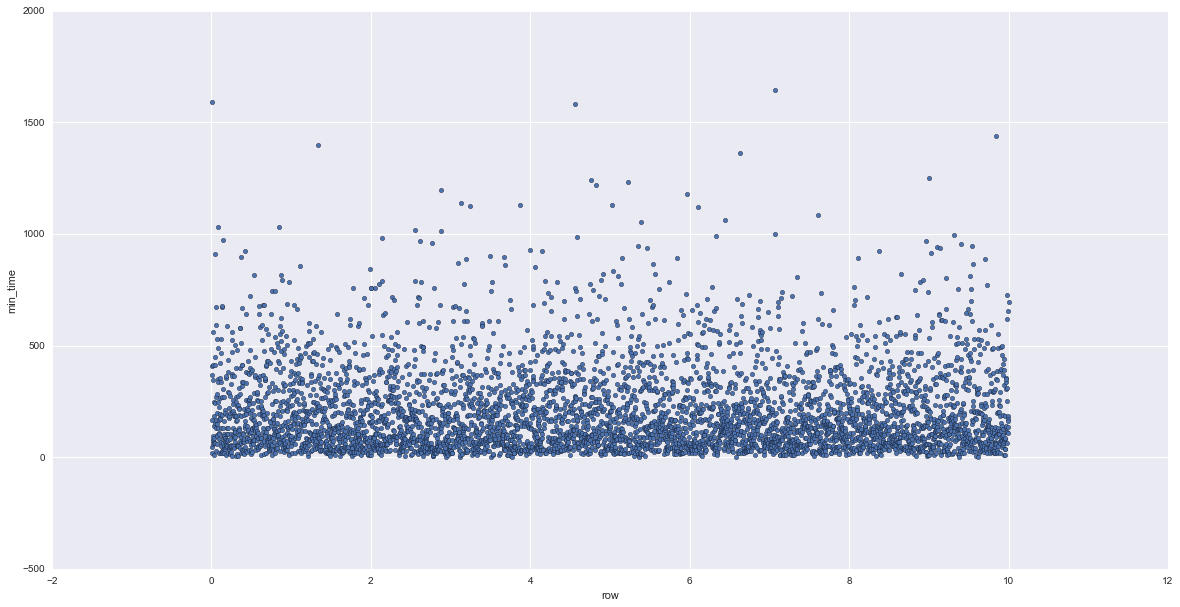

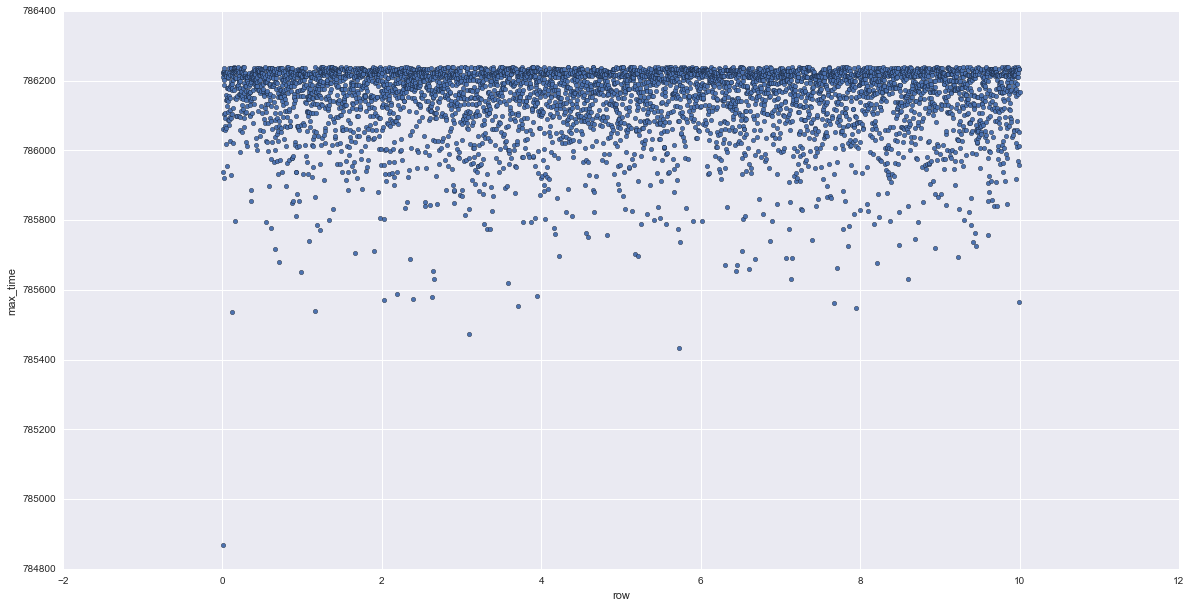

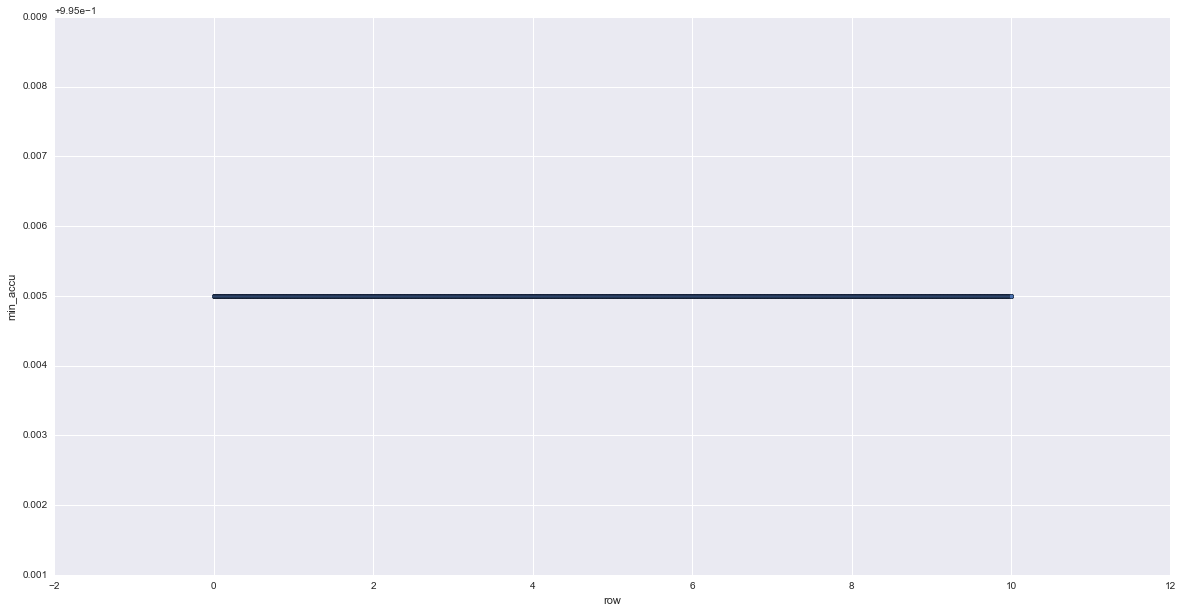

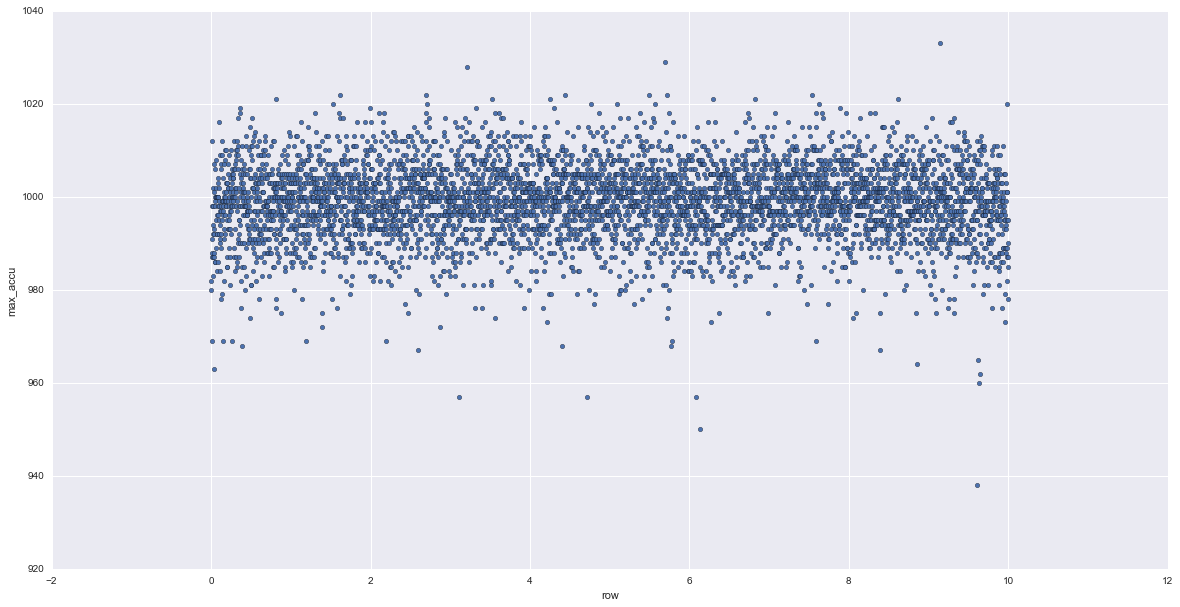

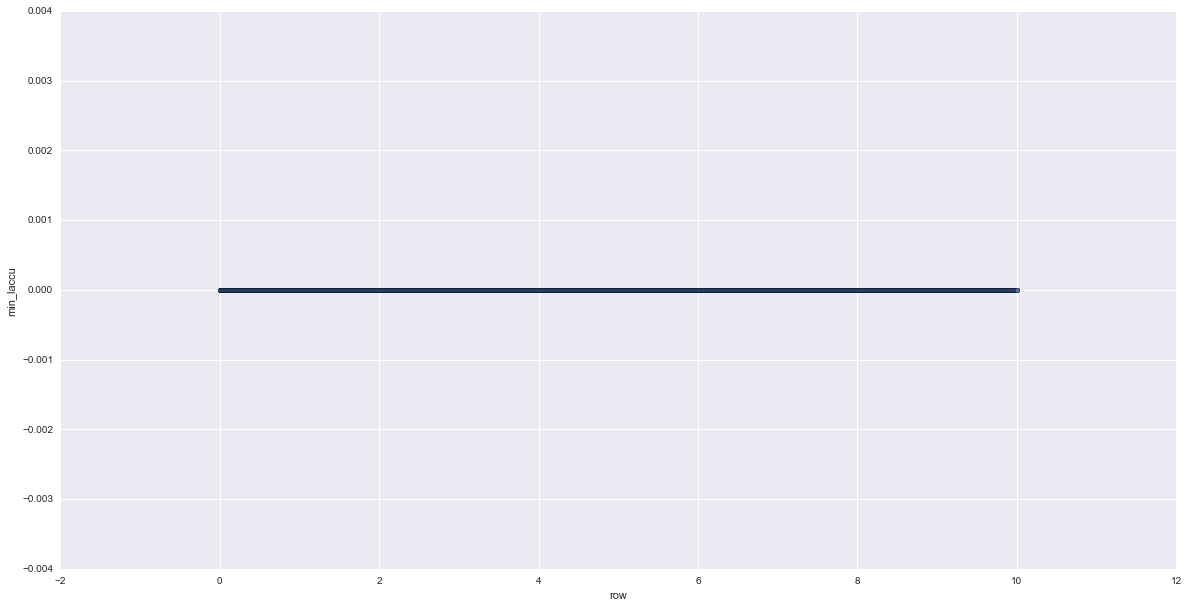

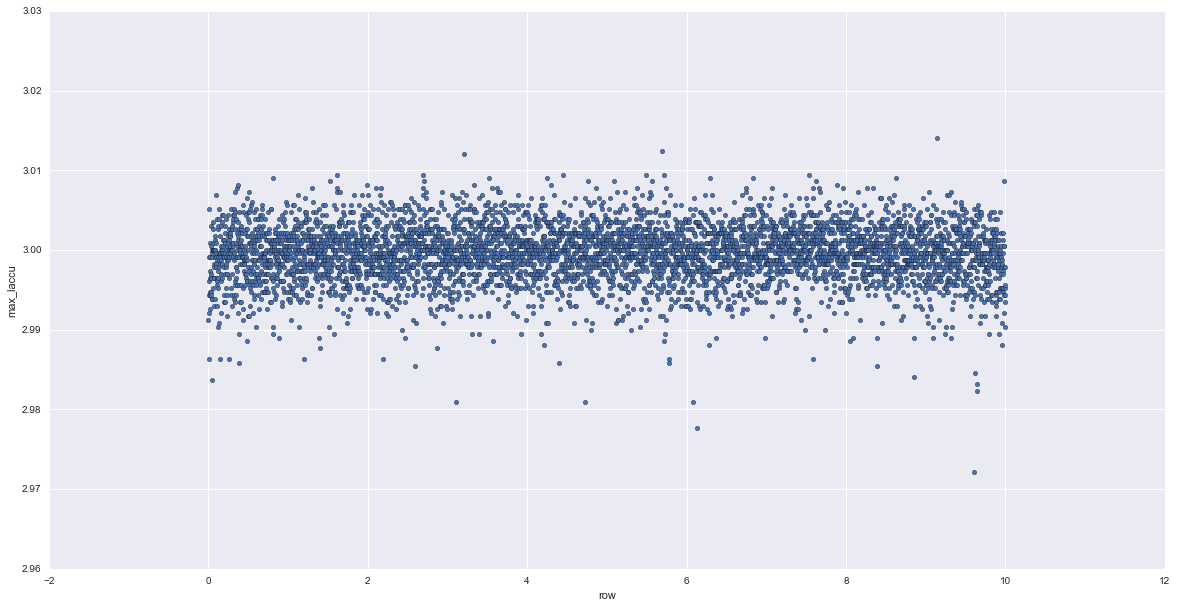

In [65]:
tdf1 = pd.DataFrame.from_records(min_times)
tdf1.plot('row', 'min_time', kind='scatter', figsize=(20,10))
tdf1.plot('row', 'max_time', kind='scatter', figsize=(20,10))
tdf1.plot('row', 'min_accu', kind='scatter', figsize=(20,10))
tdf1.plot('row', 'max_accu', kind='scatter', figsize=(20,10))
tdf1.plot('row', 'min_laccu', kind='scatter', figsize=(20,10))
tdf1.plot('row', 'max_laccu', kind='scatter', figsize=(20,10))

In [66]:
min_times_y = []
for i in xrange(5000):
    l = i / 500.0
    r = (i+1) / 500.0
    sdf = df_train[(df_train.y > l) & (df_train.y <= r)]
    min_times_y.append({
            'row': r, 
            'min_time': sdf.time.min(), 
            'max_time': sdf.time.max(),
            'min_accu': sdf.accuracy.min(),
            'max_accu': sdf.accuracy.max(),
            'min_laccu': sdf.log10_accu.min(),
            'max_laccu': sdf.log10_accu.max(),
            
        })

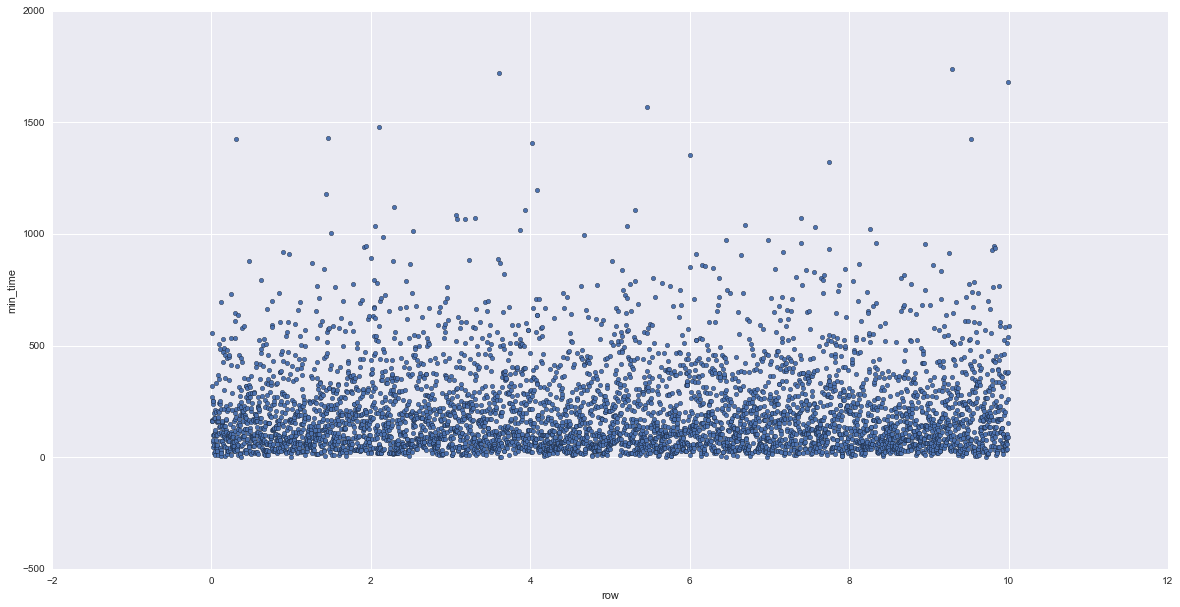

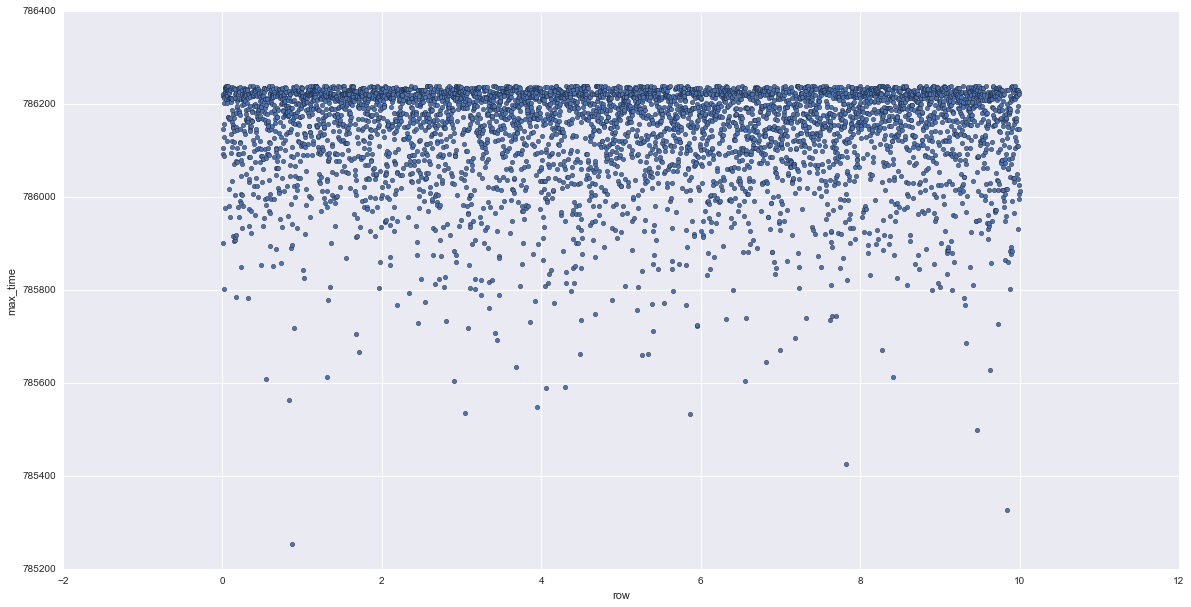

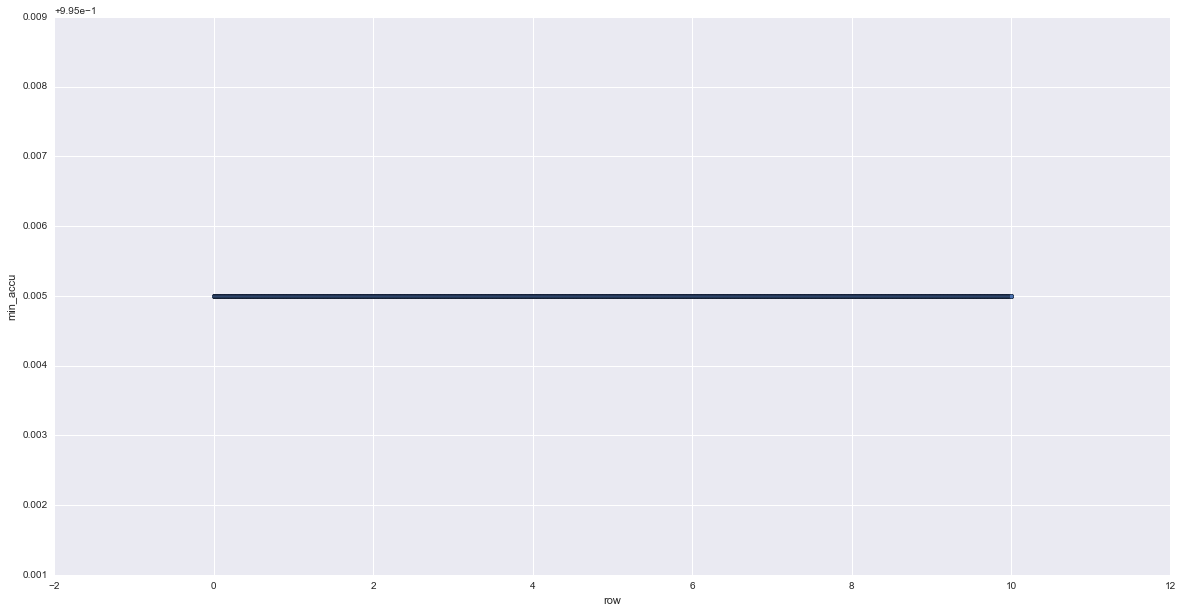

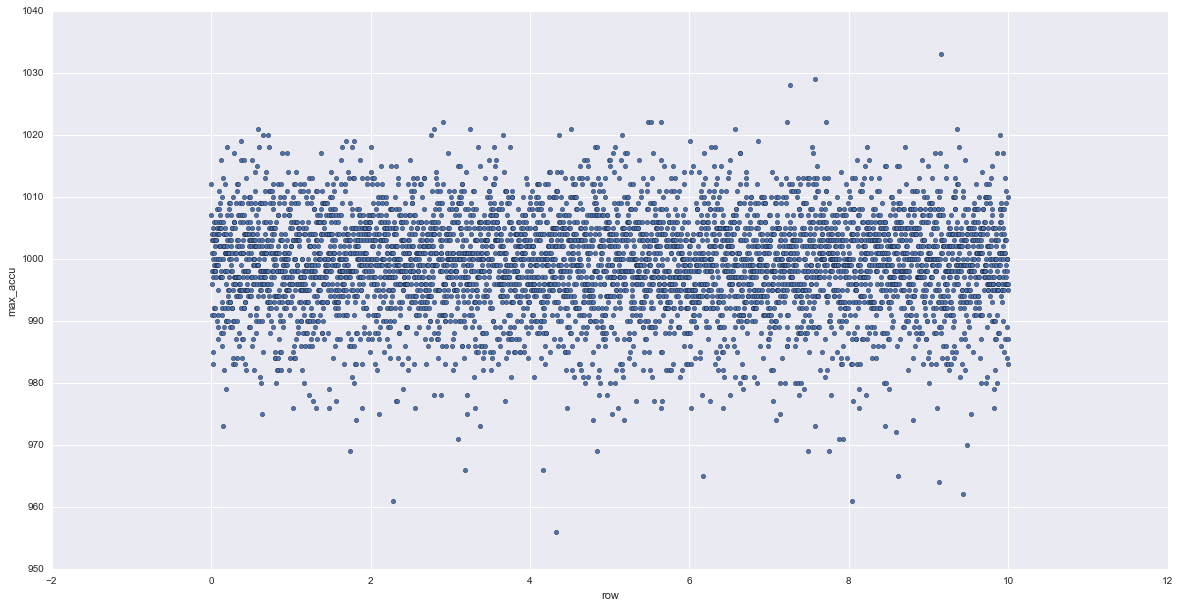

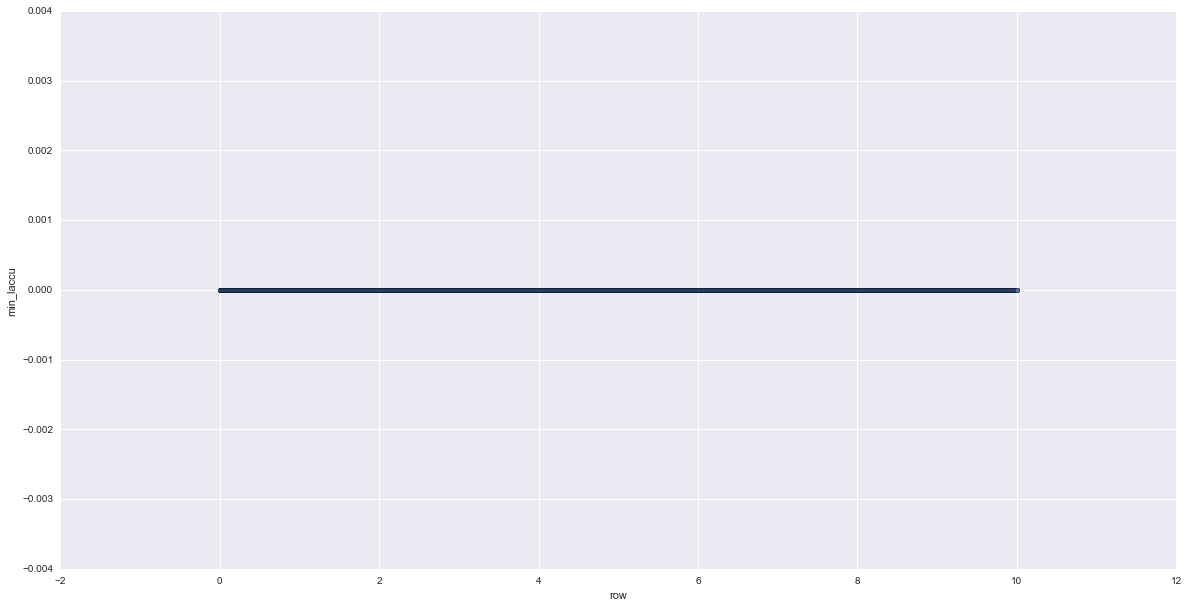

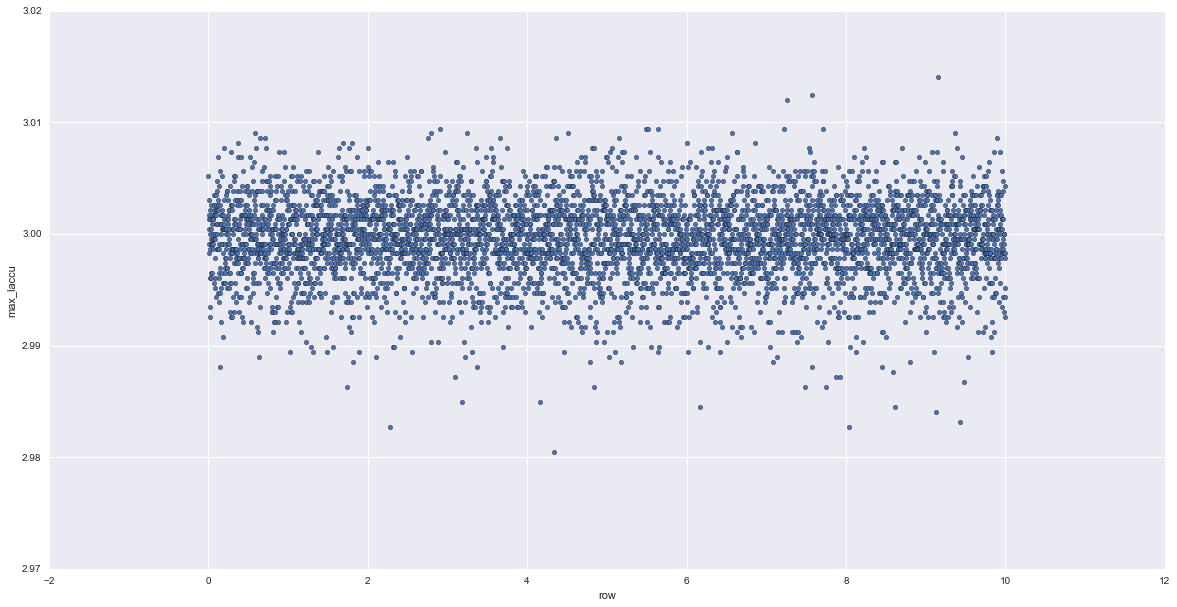

In [67]:
tdf = pd.DataFrame.from_records(min_times_y)
tdf.plot('row', 'min_time', kind='scatter', figsize=(20,10))
tdf.plot('row', 'max_time', kind='scatter', figsize=(20,10))
tdf.plot('row', 'min_accu', kind='scatter', figsize=(20,10))
tdf.plot('row', 'max_accu', kind='scatter', figsize=(20,10))
tdf.plot('row', 'min_laccu', kind='scatter', figsize=(20,10))
tdf.plot('row', 'max_laccu', kind='scatter', figsize=(20,10))

In [68]:
# Let's look at the time distribution of the top place id
top_ten_places = df_train.place_id.value_counts().head(30)
print top_ten_places

8772469670    1849
1623394281    1802
1308450003    1757
4823777529    1738
9586338177    1718
9129780742    1716
9544215131    1702
5351837004    1699
4638096372    1699
8610202964    1693
6051554924    1689
7363774279    1689
8607353836    1686
8336299754    1683
5204012807    1680
7230349735    1676
7985287621    1673
4371034975    1673
4993591840    1672
7348940462    1670
7698408658    1669
5971252160    1668
1500208175    1667
8842957841    1661
9919909729    1660
9903336130    1659
6909189260    1658
1628743555    1648
4113278218    1644
3659348746    1631
Name: place_id, dtype: int64


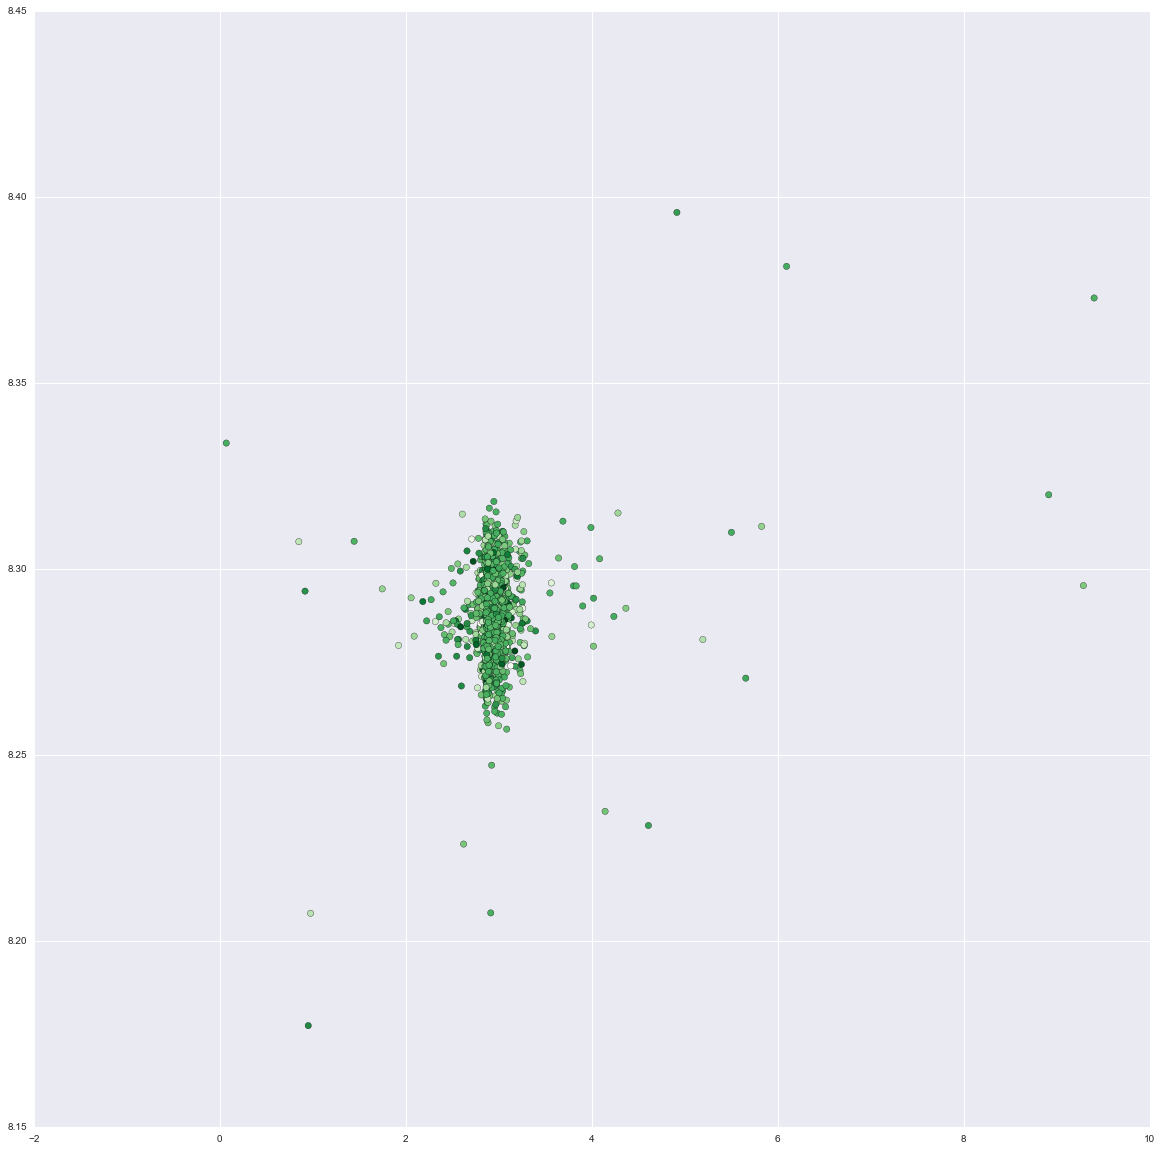

In [87]:
df_a = df_train[df_train.place_id==8772469670]
plt.figure(figsize=(20,20))
plt.scatter(df_a.x, df_a.y, c=df_a.log2_accu, s=40)
plt.set_cmap('Greens')
plt.show()

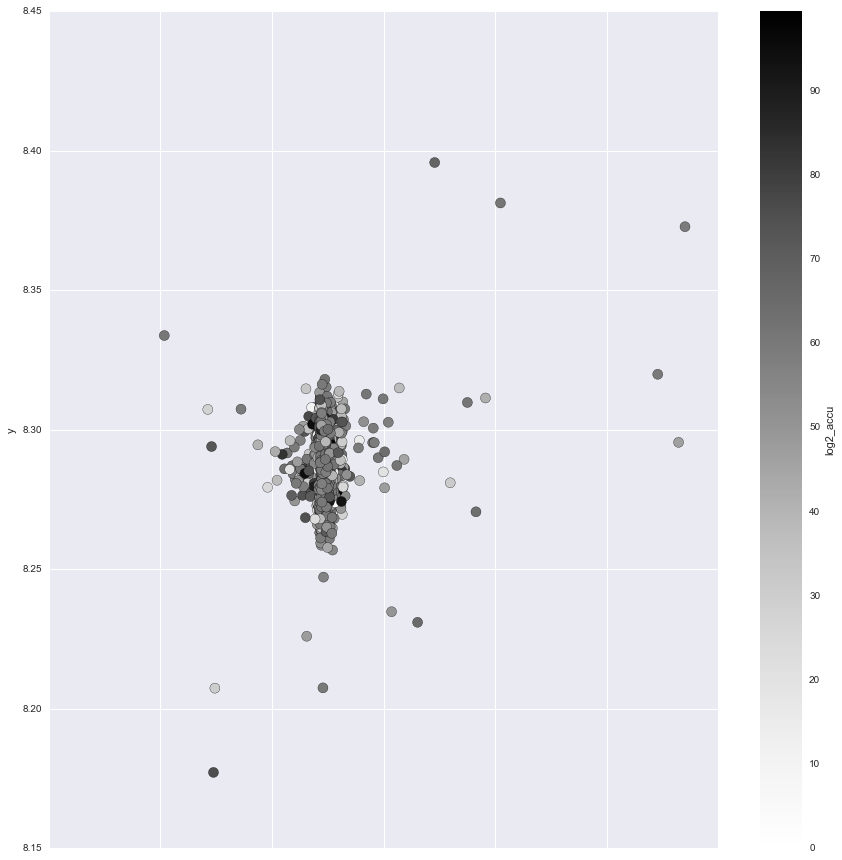

In [90]:
plt.rcParams['figure.figsize'] = (15, 15)
ax = df_a.plot(x='x', y='y', kind='scatter',  c='log2_accu', s=100, )

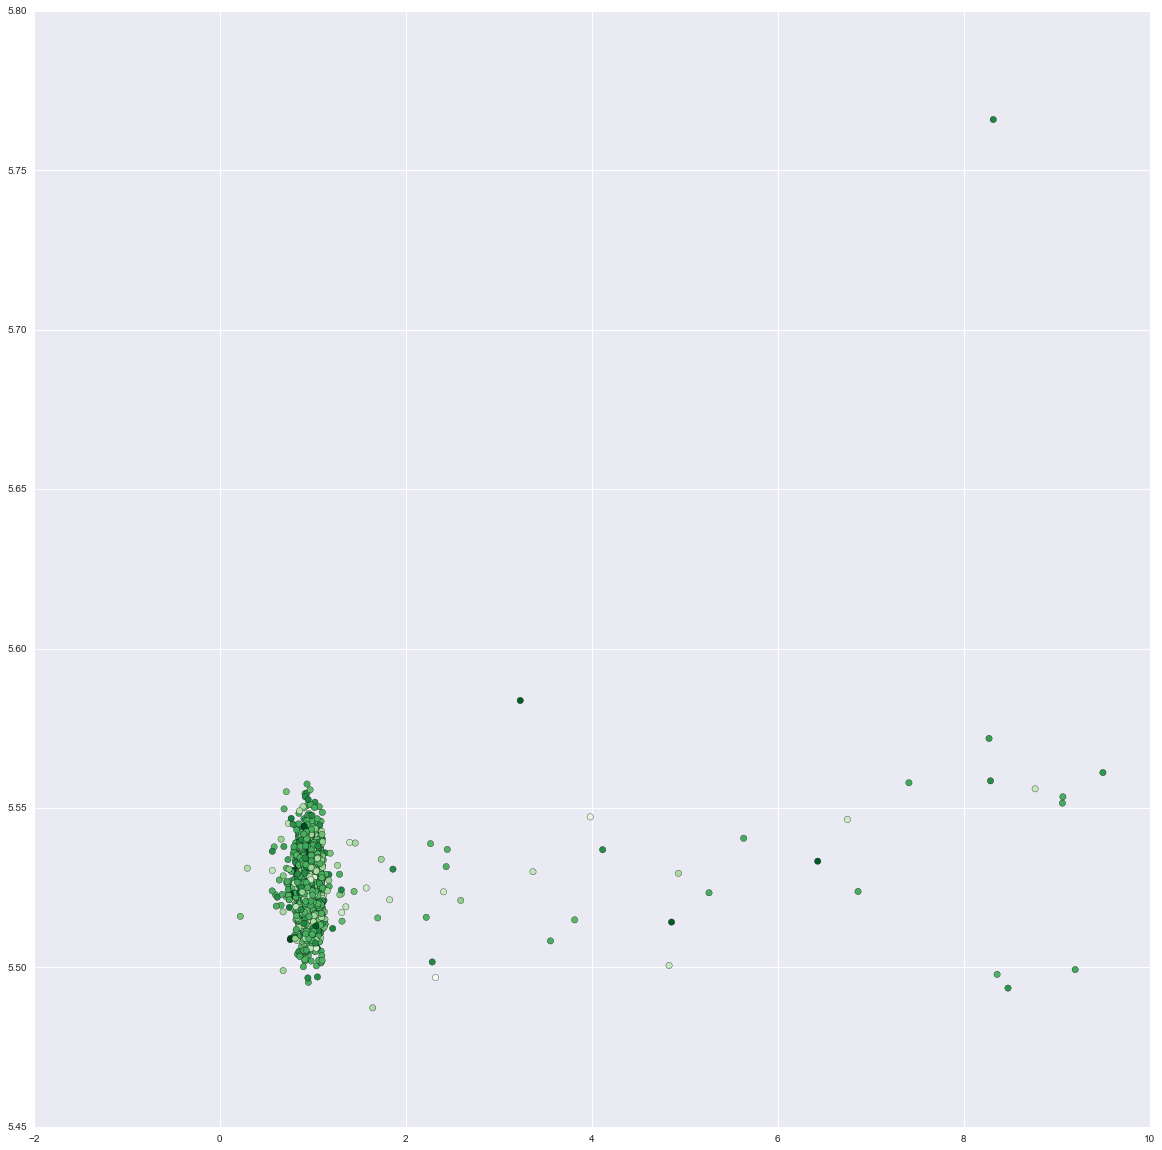

In [91]:
df_b = df_train[df_train.place_id==4113278218]
plt.figure(figsize=(20,20))
plt.scatter(df_b.x, df_b.y, c=df_b.log2_accu, s=40)
plt.set_cmap('Greens')
plt.show()

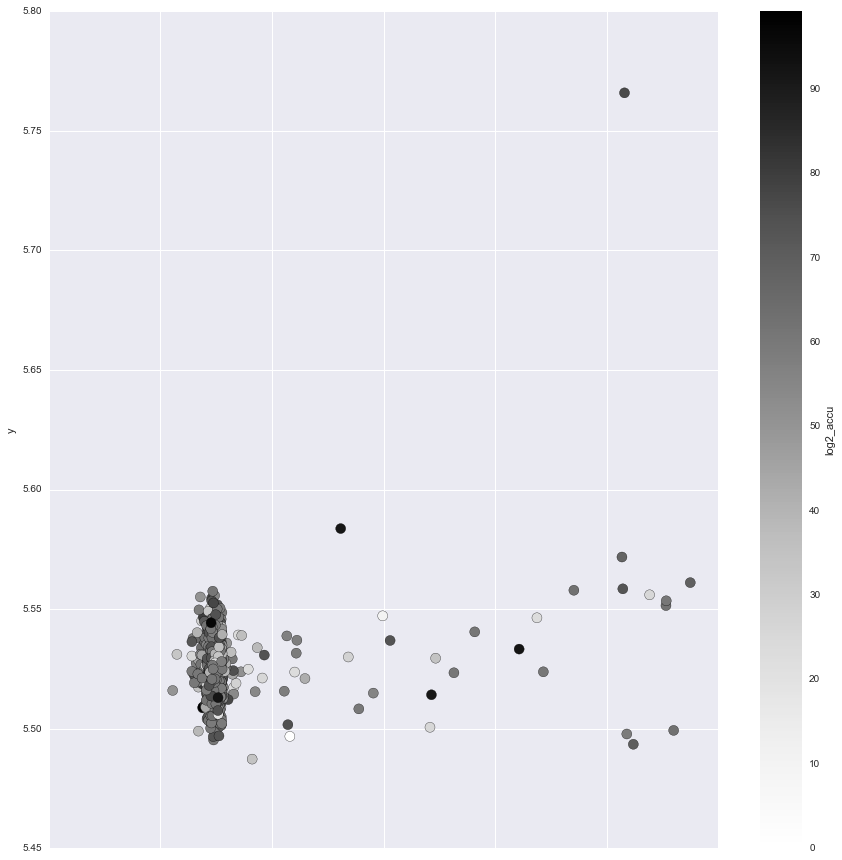

In [92]:
plt.rcParams['figure.figsize'] = (15, 15)
ax = df_b.plot(x='x', y='y', kind='scatter',  c='log2_accu', s=100, )